In [1]:
import lasio
from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Span, Label,  Range1d

# Read in log data 

In [2]:
l = lasio.read('./data/0500507128_LAS-TRIPLE COMBINATION_2646022.las')
df = l.df()
source = ColumnDataSource(df[df.index > 7190])

In [3]:
df[df.index > 7000]

,AF10,AF20,AF30,AF60,AF90,AO10,AO20,AO30,AO60,AO90,...,PXND_HILT,RHO8,RHOZ,RXOZ,SATO,SP,SPAR,TENS,TIME,TNPH
DEPT,,,,,,,,,,,,,,,,,,,,,
7000.5,7.7850,8.2815,8.1574,7.9294,7.6079,9.7417,10.2362,10.0489,9.8344,9.3750,...,0.1949,2.5084,2.5093,15.7614,NaN,-168.0625,-168.0621,2438.0,415.5,0.2298
7001.0,7.6533,8.2132,8.1001,7.8800,7.5810,7.4989,8.4094,8.4894,8.1926,7.8707,...,0.1880,2.5251,2.5207,12.6257,NaN,-168.7500,-168.7495,2432.0,415.0,0.2209
7001.5,7.2550,7.8563,7.7742,7.5841,7.2990,8.3584,7.5538,7.5358,7.1418,6.8972,...,0.1805,2.5480,2.5358,12.5710,NaN,-168.4375,-168.4369,2429.0,409.5,0.2123
7002.0,6.8463,7.3581,7.2869,7.1178,6.8799,8.8949,9.2059,8.6287,7.7704,7.4745,...,0.1813,2.5518,2.5448,12.6088,NaN,-168.9375,-168.9368,2432.0,432.0,0.2168
7002.5,6.5182,6.9228,6.8674,6.7143,6.5145,5.9970,7.9506,7.3364,6.8749,6.6402,...,0.1935,2.5127,2.5278,13.1389,NaN,-169.1875,-169.1867,2453.0,415.0,0.2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361.5,3.7327,4.1072,4.3134,4.4234,3.6549,3.7322,4.0689,4.2492,4.7094,3.6976,...,292.6829,NaN,NaN,5.0334,NaN,-174.0625,-175.2141,1550.0,1245.5,0.1288
7362.0,3.7328,4.1070,4.3137,4.4231,3.6557,3.7323,4.0685,4.2496,4.7105,3.6985,...,292.6829,NaN,NaN,5.0334,NaN,-174.0000,-174.0694,1554.0,1228.5,0.1288
7362.5,3.7329,4.1067,4.3141,4.4228,3.6567,3.7323,4.0683,4.2499,4.7114,3.6992,...,292.6829,NaN,NaN,5.0344,NaN,-174.2500,-174.1458,1536.0,1245.0,0.1288


# Get tops data from COGCC (state regulatory website)
https://cogcc.state.co.us/cogis/FacilityDetail.asp?facid=00507128&type=WELL

I copied and pasted the data from the formation tops table into a multiline string and used split and strip to get it into a dictionary.

In [4]:
text = """NIOBRARA 	6408 		N 	N
FORT HAYS 	6787 		N 	N
D SAND 	7160 		N 	N
J SAND 	7202 		N 	Y
J-2 SAND 	7228 		N 	N
SKULL CREEK 	7282"""

In [5]:
rows = [row.split('\t') for row in text.split('\n')]
tops = {row[0].strip(): int(row[1].strip()) for row in rows}
#tops = dict(names=list(tops.keys()), depth=list(tops.values()))

# Plot

In [8]:
tools = ['ypan', 'ywheel_zoom', 'reset', 'crosshair', 'hover']

track1 = figure(tools=tools, x_range=(0,200), y_range=(7260,7190), width=300)
#track1.y_range.flipped = True
track1.line(x='GR', y='DEPT', source=df, line_color='green')

track1.extra_x_ranges = {"CAL": Range1d(start=0, end=32)}
track1.line(x='HCAL', y='DEPT', source=df, line_color='gray', x_range_name='CAL')


track2 = figure(tools=tools, x_range=(.2, 2000), width=300, y_range=track1.y_range, x_axis_type='log')
track2.line(x='AT90', y='DEPT', source=df, line_color='black')
#track2.line(x='AT60', y='DEPT', source=df, line_color='red', line_width=.5)
#track2.line(x='AT30', y='DEPT', source=df, line_color='green', line_width=.5)

track3 = figure(tools=tools, x_range=(0.45, 0), width=300, y_range=track1.y_range)
track3.line(x='NPOR', y='DEPT', source=df, line_color='blue', line_width=.5)
track3.line(x='DPHZ', y='DEPT', source=df, line_color='red', line_width=.5)
track3.line(x='PHIT', y='DEPT', source=df, line_color='black', line_width=.5)

track3.extra_x_ranges = {"PEF": Range1d(start=0, end=20)}
track3.line(x='PEFZ', y='DEPT', source=df, line_color='pink', line_width=1, x_range_name="PEF")

#track3.harea(x1='NPOR', x2='DPHZ', y='DEPT', source=df, fill_alpha=.5, fill_color='red')

tracks = [track1, track2, track3]

for depth in tops.values():
    span = Span(location=depth, dimension='width', line_width=2)
    for track in tracks:
        track.add_layout(span)


    

show(row(track1, track2, track3))



In [83]:
for depth in tops.values():
    print(depth)

6408
6787
7160
7202
7228
7282


# Experimenting with Curve fills

Text(0.5, 1.0, 'regions with x2 > 1 are masked')

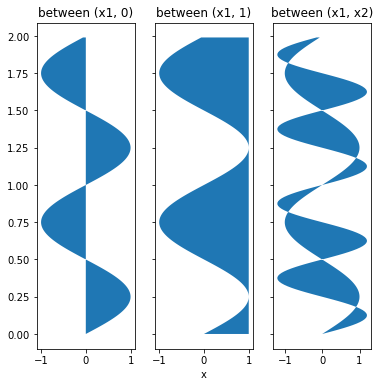

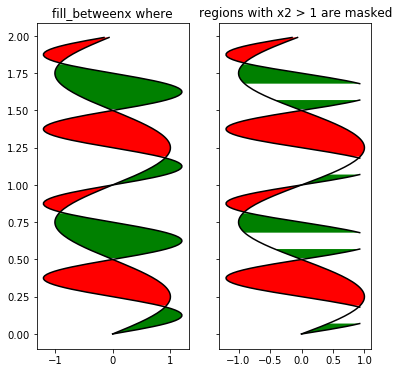

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


y = np.arange(0.0, 2, 0.01)
x1 = np.sin(2 * np.pi * y)
x2 = 1.2 * np.sin(4 * np.pi * y)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))

ax1.fill_betweenx(y, 0, x1, cmap='viridis')
ax1.set_title('between (x1, 0)')

ax2.fill_betweenx(y, x1, 1)
ax2.set_title('between (x1, 1)')
ax2.set_xlabel('x')

ax3.fill_betweenx(y, x1, x2)
ax3.set_title('between (x1, x2)')

# now fill between x1 and x2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(y[where], x1[where], x2[where])
# because of edge effects over multiple contiguous regions.

fig, [ax, ax1] = plt.subplots(1, 2, sharey=True, figsize=(6, 6))
ax.plot(x1, y, x2, y, color='black')
ax.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax.set_title('fill_betweenx where')

# Test support for masked arrays.
x2 = np.ma.masked_greater(x2, 1.0)
ax1.plot(x1, y, x2, y, color='black')
ax1.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
ax1.fill_betweenx(y, x1, x2, where=x2 <= x1, facecolor='red')
ax1.set_title('regions with x2 > 1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

In [29]:
import numpy as np
import pandas as pd

from bokeh.palettes import brewer
from bokeh.plotting import figure, output_file, show

output_file('stacked_area.html')

N = 10
df = pd.DataFrame(np.random.randint(10, 100, size=(15, N))).add_prefix('y')

p = figure(x_range=(0, len(df)-1), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

names = ["y%d" % i for i in range(N)]
p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][N], legend_label=names, source=df)

# reverse the legend entries to match the stacked order
p.legend.items.reverse()

show(p)